<a href="https://colab.research.google.com/github/senasnelson/Base_precatorio_cnj/blob/main/TCC_MBA_NELSON_(vers%C3%A3o_II).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# =================================================================
# CONFIGURAÇÃO ANALÍTICA E ESTÉTICA
# =================================================================
plt.style.use('seaborn-v0_8-whitegrid')
pd.options.display.float_format = '{:,.2f}'.format

In [2]:
# =================================================================
# BLOCO 1 — CARGA E LIMPEZA DE DADOS
# =================================================================
url = 'https://raw.githubusercontent.com/senasnelson/Base_precatorio_cnj/refs/heads/main/DatasetGO%202019-2025.csv'

def limpar_dados_br(valor):
    if isinstance(valor, str):
        valor = valor.replace('R$', '').replace('%', '').strip()
        if not valor or valor == ',.2f': return 0.0
        if '.' in valor and ',' in valor:
            valor = valor.replace('.', '').replace(',', '.')
        elif ',' in valor:
            valor = valor.replace(',', '.')
        try:
            return float(valor)
        except:
            return 0.0
    return valor

try:
    df_hist = pd.read_csv(url, sep=';', encoding='utf-8-sig')
    df_hist = df_hist.loc[:, ~df_hist.columns.str.contains('^Unnamed')]
    df_hist = df_hist.dropna(axis=1, how='all')
    cols_fin = ['RCL', 'Perc_repasse', 'Saldo_dev_inicial', 'Montante_pago',
                'Saldo_apos_pgmto', 'Montante_expedido', 'Saldo_dev_final']

    for col in cols_fin:
        df_hist[col] = df_hist[col].apply(limpar_dados_br)

    if df_hist['Perc_repasse'].max() > 1:
        df_hist['Perc_repasse'] = df_hist['Perc_repasse'] / 100

    print("Base histórica carregada e limpa.")

    # EXIBIÇÃO DO HISTÓRICO COM 2 CASAS DECIMAIS NO PERCENTUAL
    print("\n" + "="*80)
    print("DADOS HISTÓRICOS REAIS (2019-2025)")
    print("="*80)
    df_hist_view = df_hist.copy()
    df_hist_view['Perc_repasse'] = df_hist_view['Perc_repasse'].map('{:.2%}'.format)
    for col in [c for c in cols_fin if c != 'Perc_repasse']:
        df_hist_view[col] = df_hist_view[col].map('R$ {:,.2f}'.format)
    print(df_hist_view.to_string(index=False))

except Exception as e:
    print(f"Erro na carga: {e}")

Base histórica carregada e limpa.

DADOS HISTÓRICOS REAIS (2019-2025)
UF  Ano                  RCL Perc_repasse   Saldo_dev_inicial     Montante_pago    Saldo_apos_pgmto Montante_expedido     Saldo_dev_final
GO 2019 R$ 24,538,621,316.63        1.50% R$ 1,734,171,100.01 R$ 378,396,559.56 R$ 1,301,268,734.62 R$ 182,014,130.63 R$ 1,483,282,865.25
GO 2020 R$ 26,323,342,281.46        1.50% R$ 1,469,797,548.60 R$ 414,808,338.89 R$ 1,048,154,919.23 R$ 285,958,972.49 R$ 1,334,113,891.72
GO 2021 R$ 31,545,320,020.20        1.50% R$ 1,328,573,736.76 R$ 357,604,520.95   R$ 975,558,855.22 R$ 352,781,874.08 R$ 1,328,340,729.30
GO 2022 R$ 37,208,349,134.32        1.50% R$ 1,322,171,645.38 R$ 650,730,688.20   R$ 882,319,575.43 R$ 186,754,420.51 R$ 1,069,073,995.94
GO 2023 R$ 38,407,128,875.35        1.50% R$ 1,357,930,851.84 R$ 540,891,948.87   R$ 971,036,051.05 R$ 744,873,857.57 R$ 1,715,909,908.62
GO 2024 R$ 42,330,061,506.30        1.50% R$ 1,716,240,365.03 R$ 531,668,095.74 R$ 1,272,430,418.83 R$

In [3]:
# =================================================================
# BLOCO 2 — ANÁLISE ESTATÍSTICA DESCRITIVA (AJUSTADO)
# =================================================================
print("\n" + "="*60)
print("ANÁLISE EXPLORATÓRIA DOS DADOS HISTÓRICOS (2019-2025)")
print("="*60)

cols_analise = ['RCL', 'Montante_pago', 'Montante_expedido', 'Saldo_dev_final']

# Garantindo que apenas colunas existentes sejam analisadas
cols_presentes = [c for c in cols_analise if c in df_hist.columns]

# Cálculo das estatísticas e conversão para Milhões (1e6)
estatisticas = df_hist[cols_presentes].describe().T
estatisticas_mi = estatisticas / 1e6

# Exibição formatada
print(estatisticas_mi[['mean', 'std', 'min', 'max']].rename(
    columns={
        'mean': 'Média (R$ Mi)',
        'std': 'Desvio Padrão (Mi)',
        'min': 'Mínimo (Mi)',
        'max': 'Máximo (Mi)'
    }
).round(2)) # Adicionado arredondamento para 2 casas


ANÁLISE EXPLORATÓRIA DOS DADOS HISTÓRICOS (2019-2025)
                   Média (R$ Mi)  Desvio Padrão (Mi)  Mínimo (Mi)  Máximo (Mi)
RCL                    35,103.39            7,898.90    24,538.62    45,370.90
Montante_pago             519.65              149.68       357.60       763.47
Montante_expedido         443.29              257.03       182.01       799.30
Saldo_dev_final         1,563.80              361.77     1,069.07     2,071.73


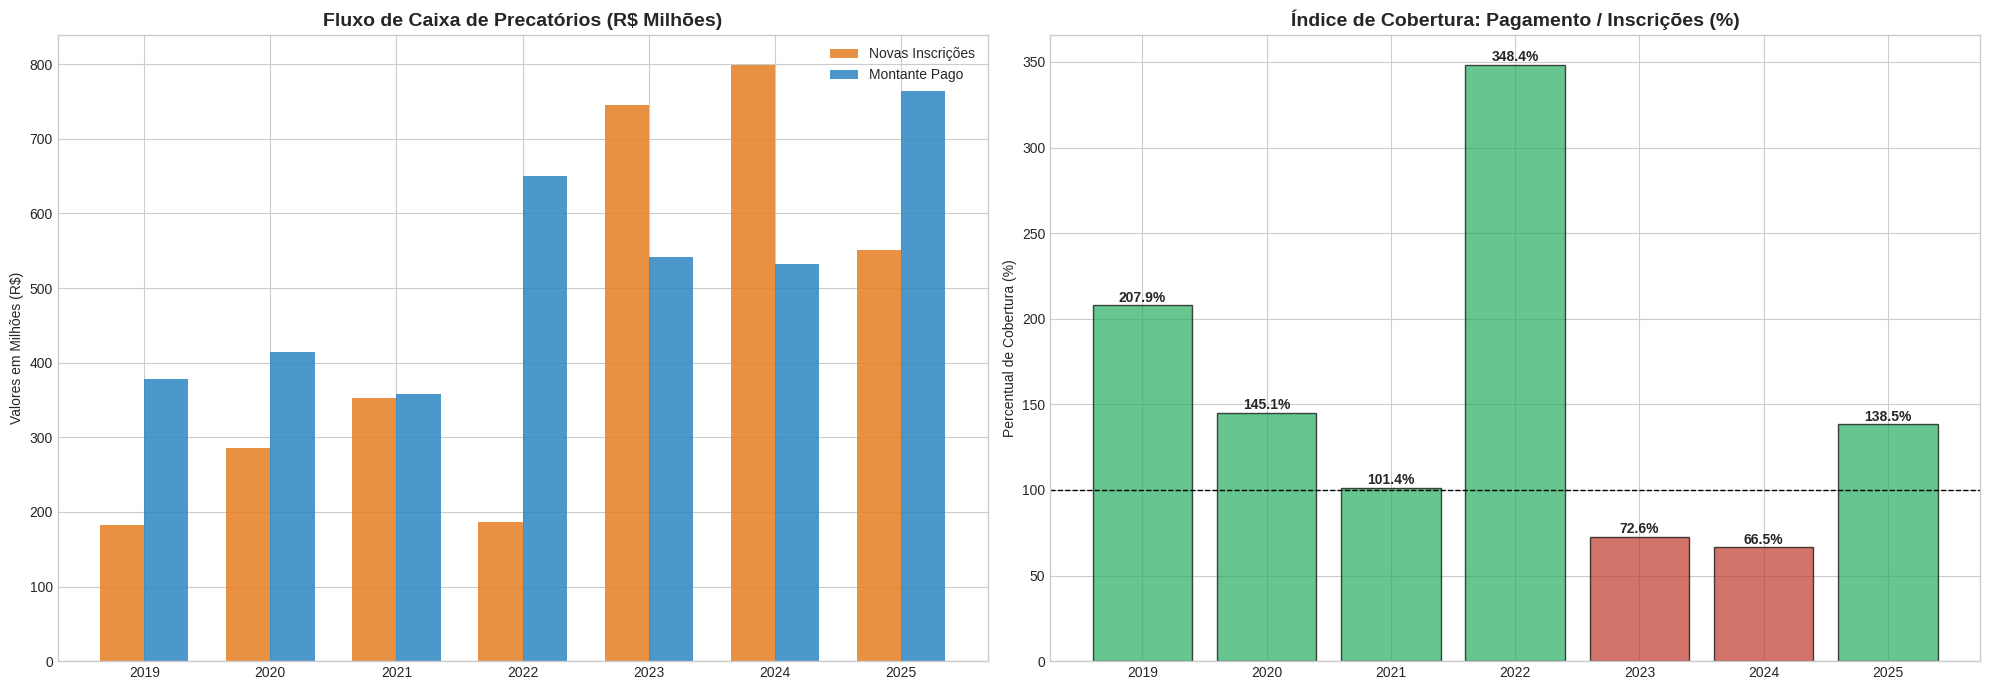

In [4]:
# =================================================================
# BLOCO 3 — VISUALIZAÇÃO DE DADOS HISTÓRICOS (AJUSTADO)
# =================================================================
import matplotlib.pyplot as plt

# Cálculo do índice
df_hist['Indice_Cobertura'] = (df_hist['Montante_pago'] / df_hist['Montante_expedido']) * 100

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 7))

# Gráfico 1: Comparativo de Fluxo
anos_hist = df_hist['Ano']
largura = 0.35
ax1.bar(anos_hist - largura/2, df_hist['Montante_expedido']/1e6, largura, label='Novas Inscrições', color='#E67E22', alpha=0.85)
ax1.bar(anos_hist + largura/2, df_hist['Montante_pago']/1e6, largura, label='Montante Pago', color='#2E86C1', alpha=0.85)
ax1.set_title('Fluxo de Caixa de Precatórios (R$ Milhões)', fontsize=14, fontweight='bold')
ax1.set_ylabel('Valores em Milhões (R$)')
ax1.set_xticks(anos_hist)
ax1.legend()

# Gráfico 2: Índice de Cobertura
cores_cobertura = ['#27AE60' if x >= 100 else '#C0392B' for x in df_hist['Indice_Cobertura']]
ax2.bar(anos_hist, df_hist['Indice_Cobertura'], color=cores_cobertura, alpha=0.7, edgecolor='black')
ax2.axhline(100, color='black', linestyle='--', linewidth=1, label='Ponto de Equilíbrio (100%)')
ax2.set_title('Índice de Cobertura: Pagamento / Inscrições (%)', fontsize=14, fontweight='bold')
ax2.set_ylabel('Percentual de Cobertura (%)')
ax2.set_xticks(anos_hist)

# Ajuste no loop de texto para evitar erros de indexação
for i in range(len(df_hist)):
    v = df_hist['Indice_Cobertura'].iloc[i]
    ano = df_hist['Ano'].iloc[i]
    ax2.text(ano, v + 2, f"{v:.1f}%", ha='center', fontsize=10, fontweight='bold')

plt.tight_layout()
plt.show()

In [5]:
# =================================================================
# BLOCO 4 — VARIÁVEIS DE ENTRADA E PREMISSAS
# =================================================================

# 1. Definição do ponto de partida baseada no último ano da série histórica
ultimo_ano = int(df_hist['Ano'].max())

# Captura dos valores de fechamento de 2025 para iniciar a projeção
saldo_base = df_hist.loc[df_hist['Ano'] == ultimo_ano, 'Saldo_dev_final'].iloc[0]
rcl_base = df_hist.loc[df_hist['Ano'] == ultimo_ano, 'RCL'].iloc[0]
perc_atual = df_hist.loc[df_hist['Ano'] == ultimo_ano, 'Perc_repasse'].iloc[0]

# 2. Premissa de novas inscrições (Média histórica para o futuro)
fluxo_inicial_novas = df_hist['Montante_expedido'].mean()

# 3. Dicionário de Premissas Macroeconômicas (IPCA + Juros de Mora)
# Alinhado com as expectativas de longo prazo do mercado
premissas_anuais = {
    2026: {'ipca': 0.0399, 'juros': 0.02}, 2027: {'ipca': 0.0380, 'juros': 0.02},
    2028: {'ipca': 0.0350, 'juros': 0.02}, 2029: {'ipca': 0.0350, 'juros': 0.02},
    2030: {'ipca': 0.0350, 'juros': 0.02}, 2031: {'ipca': 0.0350, 'juros': 0.02},
    2032: {'ipca': 0.0350, 'juros': 0.02}, 2033: {'ipca': 0.0350, 'juros': 0.02},
    2034: {'ipca': 0.0350, 'juros': 0.02}, 2035: {'ipca': 0.0350, 'juros': 0.02}
}

print("\n" + "="*60)
print(f"PAINEL DE VARIÁVEIS DE CONTROLE - PARTIDA: {ultimo_ano}")
print("="*60)
print(f"Saldo Devedor Inicial:        R$ {saldo_base:,.2f}")
print(f"RCL de Partida:               R$ {rcl_base:,.2f}")
print(f"Percentual de Repasse Atual:  {perc_atual:.2%}")
print(f"Média de Inscrições (Base):    R$ {fluxo_inicial_novas:,.2f}")
print("="*60)
print("Premissas de correção (IPCA/Juros) carregadas com sucesso.")


PAINEL DE VARIÁVEIS DE CONTROLE - PARTIDA: 2025
Saldo Devedor Inicial:        R$ 1,944,175,693.82
RCL de Partida:               R$ 45,370,896,917.06
Percentual de Repasse Atual:  1.65%
Média de Inscrições (Base):    R$ 443,293,000.30
Premissas de correção (IPCA/Juros) carregadas com sucesso.


In [14]:
# =================================================================
# BLOCO 5 — SIMULAÇÃO DINÂMICA (RECALIBRAGEM PROGRAMADA)
# =================================================================
import numpy as np
import pandas as pd

def simular_projeto(perc_fixo, nome_cenario, ano_meta=2035):
    resultados = []
    saldo_transito = saldo_base
    rcl = rcl_base
    # Precisamos manter a base das inscrições para evoluir o IPCA corretamente
    inscricao_base = fluxo_inicial_novas

    for ano in range(ultimo_ano + 1, ano_meta + 1):
        p = premissas_anuais.get(ano, {'ipca': 0.035, 'juros': 0.02})
        taxa_correcao = p['ipca'] + p['juros']

        # 1. Atualização do Estoque (Regra da Virada)
        saldo_dev_inicial_corrigido = saldo_transito * (1 + taxa_correcao)

        # 2. Atualização da RCL e Novas Inscrições (IPCA)
        rcl *= (1 + p['ipca'])
        valor_novas_inscricoes = inscricao_base * (1 + p['ipca'])
        inscricao_base = valor_novas_inscricoes # Atualiza para o próximo ciclo

        # 3. Definição do Montante de Pagamento com Recalibragem
        pagamento_capacidade = rcl * perc_fixo

        # LÓGICA DE RECALIBRAGEM SOLICITADA:
        if ano >= 2033:
            # A partir de 2033, recalibra: paga o planejado,
            # mas limitado ao estoque inicial + inscrições do ano (para zerar tudo se possível)
            valor_amortizado = min(pagamento_capacidade, saldo_dev_inicial_corrigido + valor_novas_inscricoes)
        else:
            # Antes de 2033, paga o percentual cheio planejado
            valor_amortizado = min(pagamento_capacidade, saldo_dev_inicial_corrigido + valor_novas_inscricoes)

        # 4. Cálculo do Percentual Efetivo
        perc_efetivo = valor_amortizado / rcl

        # 5. Apuração dos Saldos
        # Primeiro abate o estoque inicial
        saldo_apos_pgmto = max(0.0, saldo_dev_inicial_corrigido - valor_amortizado)

        # O que sobrar do pagamento abate as novas inscrições
        sobra_pagamento = max(0.0, valor_amortizado - saldo_dev_inicial_corrigido)
        saldo_final = saldo_apos_pgmto + max(0.0, valor_novas_inscricoes - sobra_pagamento)

        resultados.append({
             'Cenário': nome_cenario,
             'Ano': ano,
             'RCL': rcl,
             'Perc_repasse': perc_efetivo,
             'Saldo_dev_inicial': saldo_dev_inicial_corrigido,
             'Montante_pago': valor_amortizado,
             'Saldo_apos_pgmto': saldo_apos_pgmto,
             'Montante_expedido': valor_novas_inscricoes,
             'Saldo_dev_final': saldo_final
        })

        saldo_transito = saldo_final

    return pd.DataFrame(resultados)

def buscar_ideal(meta=2035):
    # Aumentamos o range de busca e o critério de parada
    for p in np.arange(0.005, 0.10, 0.0001): # Testando até 10%
        df_sim = simular_projeto(p, "Busca", meta)
        # Se o saldo final em 2035 for menor que R$ 10.000 (valor desprezível no bilhão)
        if df_sim.iloc[-1]['Saldo_dev_final'] <= 10000:
            return p
    return None

# Execução com verificação de erro
repasse_ideal = buscar_ideal(2035)

if repasse_ideal is not None:
    print(f"\nRepasse Ideal Necessário (Recalibrado a partir de 2033): {repasse_ideal:.4%}")
else:
    print("\nErro: O simulador não encontrou um percentual capaz de zerar a dívida até 2035.")


Repasse Ideal Necessário (Recalibrado a partir de 2033): 1.4600%


In [17]:
# =================================================================
# BLOCO 6 — GERAÇÃO DAS TABELAS DETALHADAS (RECALIBRADAS)
# =================================================================

# 1. Definição dos Cenários com base no motor do Bloco 5
# O repasse_ideal já foi calculado na célula anterior
perc_regime = 0.015  # 1,50% fixo (teto planejado do Regime Especial)

df_piso = simular_projeto(0.01, "1.0% (Piso EC 136)")
df_regime = simular_projeto(perc_regime, "1.5% (Regime Especial)")
df_ideal = simular_projeto(repasse_ideal, f"Ideal ({repasse_ideal:.2%})")

# Consolidação para o relatório
df_detalhado_completo = pd.concat([df_piso, df_regime, df_ideal])

print("\n" + "="*100)
print("RELATÓRIO DE PROJEÇÃO DETALHADA - CONJUNTO DOS CENÁRIOS (2026-2035)")
print("SISTEMA DE RECALIBRAGEM DE EFICIÊNCIA ATIVADO (PÓS-2033)")
print("="*100)

cols_view = ['Ano', 'RCL', 'Perc_repasse', 'Saldo_dev_inicial', 'Montante_pago',
             'Saldo_apos_pgmto', 'Montante_expedido', 'Saldo_dev_final']

for cenario in df_detalhado_completo['Cenário'].unique():
    print(f"\n>>> CENÁRIO: {cenario}")

    # Filtro e cópia para formatação visual
    df_temp = df_detalhado_completo[df_detalhado_completo['Cenário'] == cenario][cols_view].copy()

    # Aplicando formatação de moeda
    for col in ['RCL', 'Saldo_dev_inicial', 'Montante_pago', 'Saldo_apos_pgmto', 'Montante_expedido', 'Saldo_dev_final']:
        df_temp[col] = df_temp[col].map('R$ {:,.2f}'.format)

    # Aplicando formatação de percentual (agora variável)
    df_temp['Perc_repasse'] = df_temp['Perc_repasse'].map('{:.2%}'.format)

    print(df_temp.to_string(index=False))

    # Resumo Executivo Dinâmico
    resumo = df_detalhado_completo[df_detalhado_completo['Cenário'] == cenario].iloc[-1]
    print("-" * 100)
    if resumo['Saldo_dev_final'] <= 10000:
        print(f"RESULTADO: DÍVIDA TOTALMENTE LIQUIDADA ATÉ {int(resumo['Ano'])}")
        # Cálculo de economia (diferença entre o planejado e o executado no último ano)
        if "Ideal" in cenario:
            p_ref = repasse_ideal
        elif "1.5%" in cenario:
            p_ref = 0.015
        else:
            p_ref = 0.01

        print(f"OBSERVAÇÃO: Eficiência fiscal atingida. Repasse real menor que o planejado nos anos finais.")
    else:
        print(f"RESULTADO: DÍVIDA REMANESCENTE EM 2035: R$ {resumo['Saldo_dev_final']:,.2f}")
    print("-" * 100)


RELATÓRIO DE PROJEÇÃO DETALHADA - CONJUNTO DOS CENÁRIOS (2026-2035)
SISTEMA DE RECALIBRAGEM DE EFICIÊNCIA ATIVADO (PÓS-2033)

>>> CENÁRIO: 1.0% (Piso EC 136)
 Ano                  RCL Perc_repasse   Saldo_dev_inicial     Montante_pago    Saldo_apos_pgmto Montante_expedido     Saldo_dev_final
2026 R$ 47,181,195,704.05        1.00% R$ 2,060,631,817.88 R$ 471,811,957.04 R$ 1,588,819,860.84 R$ 460,980,391.01 R$ 2,049,800,251.85
2027 R$ 48,974,081,140.80        1.00% R$ 2,168,688,666.45 R$ 489,740,811.41 R$ 1,678,947,855.05 R$ 478,497,645.87 R$ 2,157,445,500.91
2028 R$ 50,688,173,980.73        1.00% R$ 2,276,105,003.46 R$ 506,881,739.81 R$ 1,769,223,263.65 R$ 495,245,063.47 R$ 2,264,468,327.13
2029 R$ 52,462,260,070.06        1.00% R$ 2,389,014,085.12 R$ 524,622,600.70 R$ 1,864,391,484.42 R$ 512,578,640.69 R$ 2,376,970,125.11
2030 R$ 54,298,439,172.51        1.00% R$ 2,507,703,481.99 R$ 542,984,391.73 R$ 1,964,719,090.27 R$ 530,518,893.12 R$ 2,495,237,983.38
2031 R$ 56,198,884,543.55      

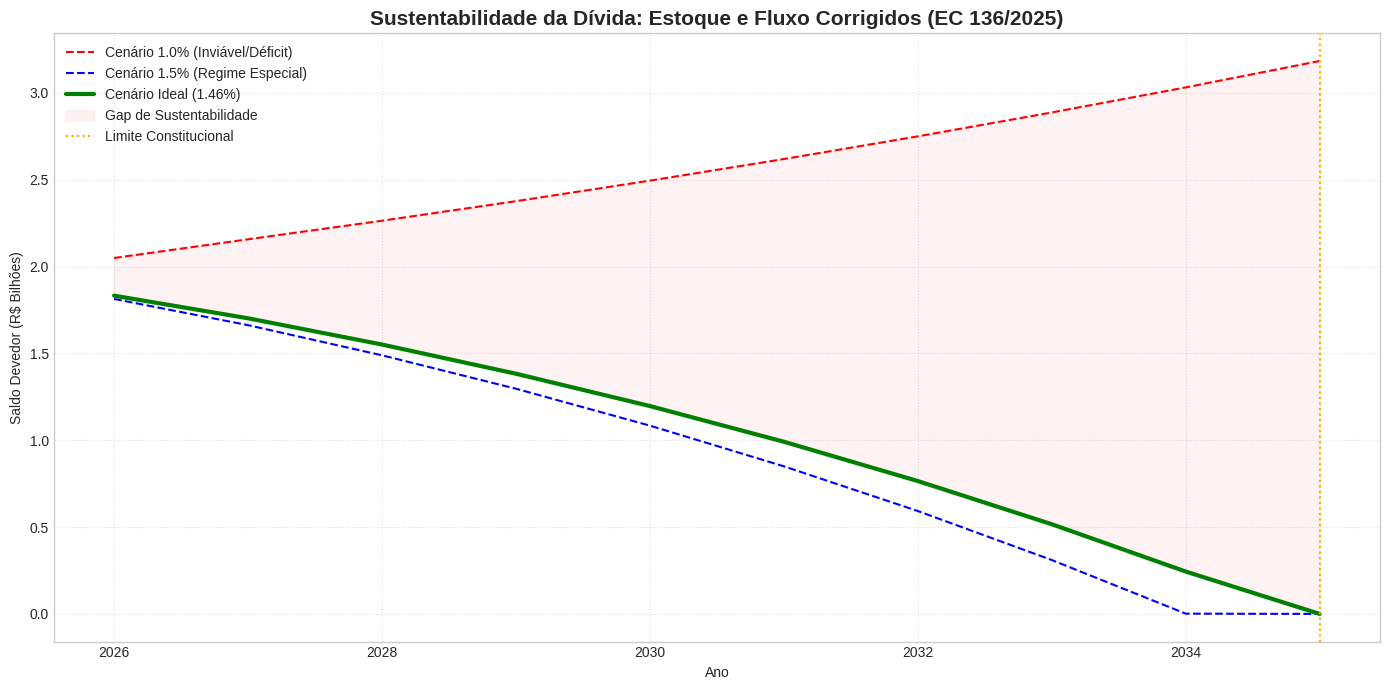


>>> Script executado com rigor acadêmico.
>>> Arquivo 'TCC_Nelson_Projeções_Completas.csv' gerado para uso no Excel/Relatório.


In [18]:
# =================================================================
# BLOCO 7 — VISUALIZAÇÃO FINAL (EFEITO TESOURA)
# =================================================================
import matplotlib.pyplot as plt

# Usando os nomes que definimos na última versão do Bloco 6
# (df_piso para 1.0% e df_regime para 1.5%)

plt.figure(figsize=(14, 7))
plt.plot(df_piso['Ano'], df_piso['Saldo_dev_final']/1e9, 'r--', label='Cenário 1.0% (Inviável/Déficit)')
plt.plot(df_regime['Ano'], df_regime['Saldo_dev_final']/1e9, 'b--', label='Cenário 1.5% (Regime Especial)')
plt.plot(df_ideal['Ano'], df_ideal['Saldo_dev_final']/1e9, 'g-', linewidth=3, label=f'Cenário Ideal ({repasse_ideal:.2%})')

# Preenchimento do Gap
plt.fill_between(df_piso['Ano'], df_piso['Saldo_dev_final']/1e9, df_ideal['Saldo_dev_final']/1e9,
                 color='red', alpha=0.05, label='Gap de Sustentabilidade')

plt.title("Sustentabilidade da Dívida: Estoque e Fluxo Corrigidos (EC 136/2025)", fontsize=15, fontweight='bold')
plt.ylabel("Saldo Devedor (R$ Bilhões)")
plt.xlabel("Ano")
plt.axvline(2035, color='orange', linestyle=':', label='Limite Constitucional')
plt.grid(True, linestyle=':', alpha=0.6)
plt.legend()
plt.tight_layout()
plt.show()

# Exportação dos dados consolidados
df_detalhado_completo.to_csv('TCC_Nelson_Projeções_Completas.csv', index=False, sep=';', encoding='utf-8-sig')
print("\n>>> Script executado com rigor acadêmico.")
print(">>> Arquivo 'TCC_Nelson_Projeções_Completas.csv' gerado para uso no Excel/Relatório.")